# 前置作業

### 設定路徑

In [ ]:
import os
from google.colab import drive
print(os.getcwd())

/content


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/ColabNotebooks/Thesis'
os.chdir(path)

### 載入套件

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import cv2
import csv
import struct
import time
from torch import optim

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import prettytable as pt
from mpl_toolkits.axes_grid1 import AxesGrid
import scipy.ndimage

import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch import nn
import torch.nn.functional as F
from torch.utils.data import ConcatDataset

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import skimage as ski
from skimage.filters import rank
from skimage import color, exposure, io
from skimage.morphology import disk


from skimage.feature import hog
from skimage.feature import local_binary_pattern
from skimage import color
from skimage.util import img_as_ubyte


###設定GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(0)
np.random.seed(0)

### 載入資料

In [ ]:
train_data = datasets.CIFAR100(
    root = 'data',
    train = True,
    download = True
)

test_data = datasets.CIFAR100(
    root = 'data',
    train = False,
    download = True
)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/utils.py", line 44, in calculate_md5
    while chunk := f.read(chunk_size):
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-c5f835509ffa>", line 1, in <cell line: 1>
    train_data = datasets.CIFAR100(
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/cifar.py", line 66, in __init__
    self.download()
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/cifar.py", line 137, in download
    if self._check_integrity():
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/cifar.py", line 132, in _check_integrity
    if not check_integrity(fpa

Classes:
每個類別有(500train:100test)
1. (0-4): beaver, dolphin, otter, seal, whale  
2. (5-9): aquarium fish, flatfish, ray, shark, trout  
3. (10-14) orchid, poppy, rose, sunflower, tulip  
4. (15-19) bottle, bowl, can, cup, plate  
5. (20-24) apple, mushroom, orange, pear, sweet pepper  
6. (25-29) clock, keyboard, lamp, telephone, television  
7. (30-34) bed, chair, couch, table, wardrobe  
8. (35-39) bee, beetle, butterfly, caterpillar, cockroach  
9. (40-44) bear, leopard, lion, tiger, wolf  
10. (45-49) bridge, castle, house, road, skyscraper  
11. (50-54) cloud, forest, mountain, plain, sea  
12. (55-59) camel, cattle, chimpanzee, elephant, kangaroo  
13. (60-64) fox, porcupine, possum, raccoon, skunk  
14. (65-69) crab, lobster, snail, spider, worm  
15. (70-74) baby, boy, girl, man, woman  
16. (75-79) crocodile, dinosaur, lizard, snake, turtle  
17. (80-84) hamster, mouse, rabbit, shrew, squirrel  
18. (85-89) maple_tree, oak_tree, palm_tree, pine_tree, willow_tree
19. (90-94) bicycle, bus, motorcycle, pickup truck, train  
20. (95-99) lawn-mower, rocket, streetcar, tank, tractor

### 依照大類別切割為20個資料集

In [ ]:
class_name = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout',
            'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'bottle', 'bowl', 'can', 'cup', 'plate',
            'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper', 'clock', 'keyboard', 'lamp', 'telephone', 'television',
            'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
            'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper',
            'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
            'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm',
            'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
            'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree',
            'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
old_class_name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
            'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
            'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
            'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
            'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
            'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
            'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
            'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
            'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
            'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

indices = [class_name.index(item) for item in old_class_name]
class_index = [i for i in range(100)]
class_dict = dict(zip(class_index, class_name))

In [ ]:
X_train_array = train_data.data.reshape(-1, 32*32*3)
y_train_array = np.array([indices[i] for i in train_data.targets])
X_test_array = test_data.data.reshape(-1, 32*32*3)
y_test_array = np.array([indices[i] for i in test_data.targets])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-7ad7072833da>", line 1, in <cell line: 1>
    X_train_array = train_data.data.reshape(-1, 32*32*3)
NameError: name 'train_data' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python

In [ ]:

X_array = np.concatenate([X_train_array, X_test_array])
y_array = np.concatenate([y_train_array, y_test_array])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-50f4d93cd036>", line 1, in <cell line: 1>
    X_array = np.concatenate([X_train_array, X_test_array])
NameError: name 'X_train_array' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/

# 畫圖

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-124e756208e0>", line 10, in <cell line: 5>
    ax.imshow(X_array[list(y_array).index(i)].reshape(32, 32, 3))
NameError: name 'X_array' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib

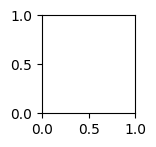

In [ ]:
plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(10, 11, width_ratios=[1]*5 + [0.5] + [1]*5)

plot_index = 0
for i in range(100):
    if i % 10 == 5:
        plot_index += 1

    ax = plt.subplot(gs[plot_index // 11, plot_index % 11])
    ax.imshow(X_array[list(y_array).index(i)].reshape(32, 32, 3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.set_xlabel(class_name[y_array[list(y_array).index(i)]], fontsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i % 5 == 0:
        super_class_index = i // 5 + 1
        ax.text(-0.3, 0.5, f"Superclass{super_class_index}", transform=ax.transAxes,
                fontsize=9, verticalalignment='center', horizontalalignment='right',
                rotation='vertical')

    plot_index += 1

plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()

In [ ]:
num_classes = len(train_data.classes)

datasets_dict = {}

for superclass_index in range(20):
  indices = []
  for class_index in range(num_classes):
    if class_index//5 == superclass_index:
      indices.extend(np.where(y_array == class_index)[0])
  datasets_dict[f'X_{superclass_index}'] = X_array[indices]
  datasets_dict[f'y_{superclass_index}'] = y_array[indices]

In [ ]:
for i in range(20):
    print(f'Class {i} Data Shape: {datasets_dict[f"X_{i}"].shape}')

Class 0 Data Shape: (3000, 3072)
Class 1 Data Shape: (3000, 3072)
Class 2 Data Shape: (3000, 3072)
Class 3 Data Shape: (3000, 3072)
Class 4 Data Shape: (3000, 3072)
Class 5 Data Shape: (3000, 3072)
Class 6 Data Shape: (3000, 3072)
Class 7 Data Shape: (3000, 3072)
Class 8 Data Shape: (3000, 3072)
Class 9 Data Shape: (3000, 3072)
Class 10 Data Shape: (3000, 3072)
Class 11 Data Shape: (3000, 3072)
Class 12 Data Shape: (3000, 3072)
Class 13 Data Shape: (3000, 3072)
Class 14 Data Shape: (3000, 3072)
Class 15 Data Shape: (3000, 3072)
Class 16 Data Shape: (3000, 3072)
Class 17 Data Shape: (3000, 3072)
Class 18 Data Shape: (3000, 3072)
Class 19 Data Shape: (3000, 3072)


#影像處理

## 自定義函數

In [ ]:
def vchannel(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:, :, 2]

Sharpening

In [ ]:
def sharpening(imgs):

  laplacian_kernel = np.array([[0, -1, 0],
                               [-1, 4, -1],
                               [0, -1, 0]], dtype=np.float32)

  imgs_sharp = []
  for img in imgs:
    img = img.reshape(32, 32, 3)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_sharpening = cv2.filter2D(vchannel(img), -1, laplacian_kernel)
    alpha = 1.0
    img_hsv[:, :, 2] = cv2.addWeighted(img_hsv[:, :, 2], 1.0, img_sharpening, alpha, 0)
    img_sharpened = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    img_sharpened = np.clip(img_sharpened, 0, 255).astype(np.uint8)
    imgs_sharp.append(img_sharpened)

  imgs_sharp = np.array(imgs_sharp).reshape(-1, 32 * 32 * 3)
  return imgs_sharp

Constract_Stretching

In [ ]:
def contrast_stretching(imgs):
  imgs_cs = []
  for img in imgs:
    img = img.reshape(32, 32, 3)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    p1, p2 = np.percentile(img_hsv[:, :, 2], (2, 98))
    ps_img = (img_hsv[:, :, 2] - p1) / (p2 - p1) * 255
    img_hsv[:, :, 2] = np.clip(ps_img, 0, 255).astype(np.uint8)
    img_cs = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    imgs_cs.append(img_cs)
  imgs_cs = np.array(imgs_cs).reshape(-1,32*32*3)
  return imgs_cs


Histogram_qualization

In [ ]:
def histogram_equalization(imgs):
  imgs_eq = []
  for img in imgs:
    img = img.reshape(32, 32, 3)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
    img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    imgs_eq.append(img_eq)
  imgs_eq = np.array(imgs_eq).reshape(-1, 32*32*3)
  return imgs_eq

##轉換

In [ ]:
X_ = datasets_dict['X_0']
y_ = datasets_dict['y_0']

X_array_list = [X_, sharpening(X_), contrast_stretching(X_), histogram_equalization(X_)]
process_list = ['Original', 'Sharpening', 'Contrast_Stretching', 'Histogram_Equalization']

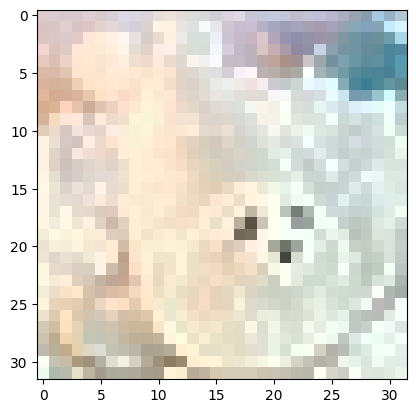

In [ ]:
plt.imshow(X_array_list[1][1936].reshape(32, 32, 3))

###Sharpening

In [ ]:
# 原圖、sharpen後的銳化圖、結果圖 (灰) (確認是要用v通道還是原圖轉灰? 還是是一樣意思?)


In [ ]:
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]], dtype=np.float32)

#laplacian_kernel = np.array([[-1, -1, -1],
#                             [-1, 8, -1],
#                             [-1, -1, -1]], dtype=np.float32)

In [ ]:
img = X_[1936] # 1
img_sharpening = cv2.filter2D(img, -1, laplacian_kernel) # 2
alpha = 1.0
img_sharpened = cv2.addWeighted(img, 1.0, img_sharpening, alpha, 0)
img_sharpened = np.clip(img_sharpened, 0, 255).astype(np.uint8) # 3

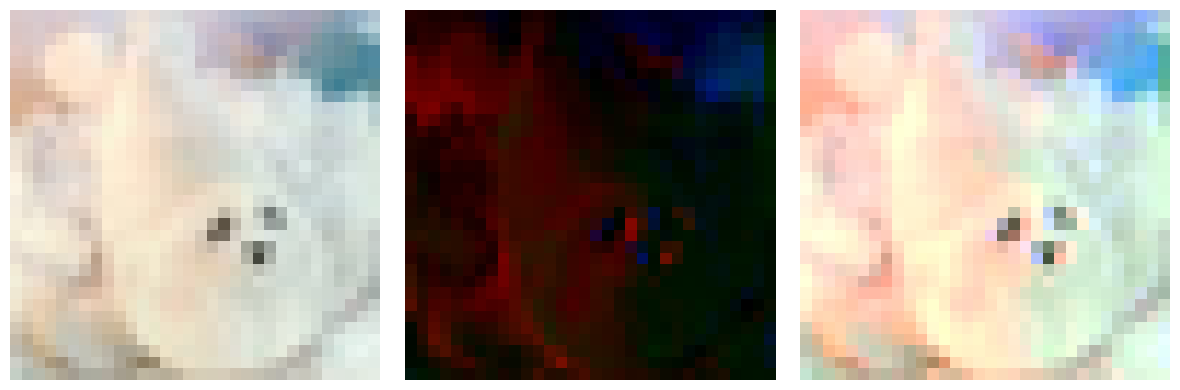

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img.reshape(32, 32, 3),cmap='gray')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_axis_off()
axes[1].imshow(img_sharpening.reshape(32, 32, 3),cmap='gray')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_axis_off()
axes[2].imshow(img_sharpened.reshape(32, 32, 3),cmap='gray')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_axis_off()

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
img = X_[1936].reshape(32, 32, 3) # 1
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_sharpening = cv2.filter2D(vchannel(img), -1, laplacian_kernel) # 2
alpha = 1.0
img_hsv[:, :, 2] = cv2.addWeighted(img_hsv[:, :, 2], 1.0, img_sharpening, alpha, 0)
img_sharpened = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
img_sharpened = np.clip(img_sharpened, 0, 255).astype(np.uint8) # 3

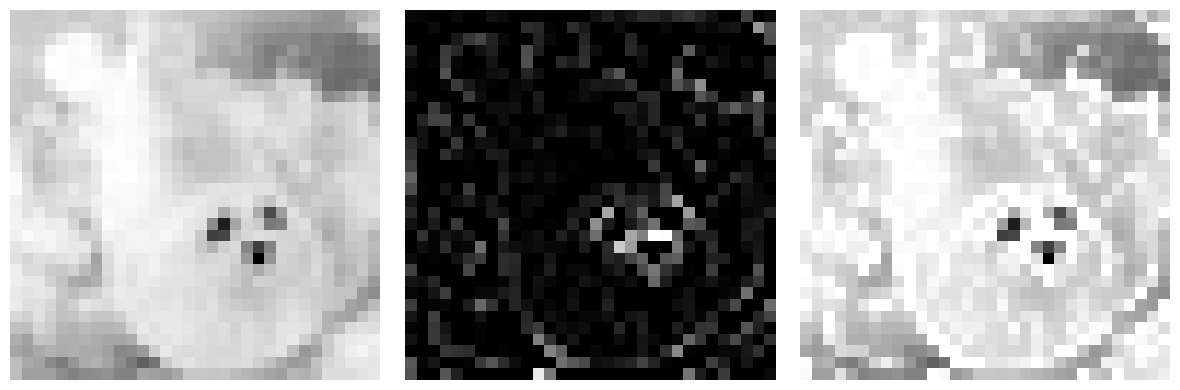

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(vchannel(img),cmap='gray')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_axis_off()
axes[1].imshow(img_sharpening,cmap='gray')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_axis_off()
axes[2].imshow(vchannel(img_sharpened),cmap='gray')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_axis_off()

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# 原圖、銳化後的圖 (彩)


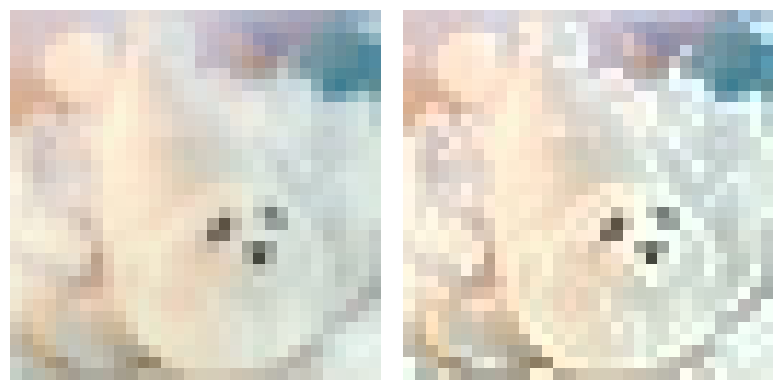

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(img)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_axis_off()
axes[1].imshow(img_sharpened,cmap='gray')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_axis_off()

plt.tight_layout()
plt.grid(False)
plt.show()

### Contrast Stretching

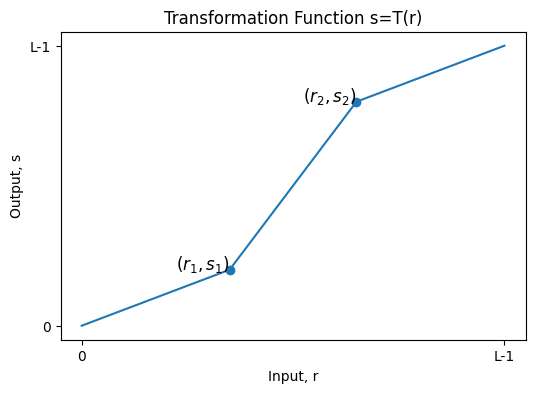

In [ ]:
r1, s1 = 0.35, 0.2
r2, s2 = 0.65, 0.8

L = 1
r = np.linspace(0, L, 500)
s = np.zeros_like(r)

s[r <= r1] = r[r <= r1] / r1 * s1
s[(r > r1) & (r <= r2)] = ((r[(r > r1) & (r <= r2)] - r1) / (r2 - r1) * (s2 - s1)) + s1
s[r > r2] = ((r[r > r2] - r2) / (L - r2) * (L - s2)) + s2

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, s, label='T(r)')
ax.scatter([r1,r2], [s1,s2])
ax.text(r1, s1, r'$(r_1, s_1)$', fontsize=12, ha='right')
ax.text(r2, s2, r'$(r_2, s_2)$', fontsize=12, ha='right')
ax.set_xlabel('Input, r')
ax.set_ylabel('Output, s')
ax.set_xticks([0, L])
ax.set_xticklabels(['0', 'L-1'])
ax.set_yticks([0, L])
ax.set_yticklabels(['0', 'L-1'])
plt.title('Transformation Function s=T(r)')
plt.grid(False)
plt.show()

In [ ]:
img_idx = 1936
img = X_array_list[0][img_idx].reshape(32, 32, 3)
y_lim = np.max(np.unique(vchannel(img).ravel(),return_counts=True)[1]+2)

In [ ]:
# 方法一過程圖(灰): 原圖 / 原圖hist
#                  處理 / 處理hist

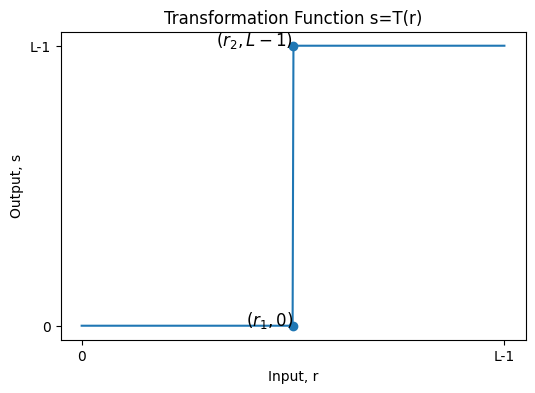

In [ ]:
r1, s1 = 0.5, 0
r2, s2 = 0.5, 1

L = 1
r = np.linspace(0, L, 500)
s = np.zeros_like(r)

s[r <= r1] = 0
s[r > r1] = 1

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, s, label='T(r)')
ax.scatter([r1,r2], [s1,s2])
ax.text(r1, s1, r'$(r_1, 0)$', fontsize=12, ha='right')
ax.text(r2, s2, r'$(r_2, L-1)$', fontsize=12, ha='right')
ax.set_xlabel('Input, r')
ax.set_ylabel('Output, s')
ax.set_xticks([0, L])
ax.set_xticklabels(['0', 'L-1'])
ax.set_yticks([0, L])
ax.set_yticklabels(['0', 'L-1'])
plt.title('Transformation Function s=T(r)')
plt.grid(False)
plt.show()

In [ ]:
# Thresholding
img_cs_thr_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
p50 = np.percentile(img_cs_thr_hsv[:, :, 2].ravel(), 50)
_, ps_img = cv2.threshold(img_cs_thr_hsv[:, :, 2], p50, 255, cv2.THRESH_BINARY)
img_cs_thr_hsv[:, :, 2] = ps_img.astype(np.uint8)
img_cs_thr = cv2.cvtColor(img_cs_thr_hsv, cv2.COLOR_HSV2RGB)

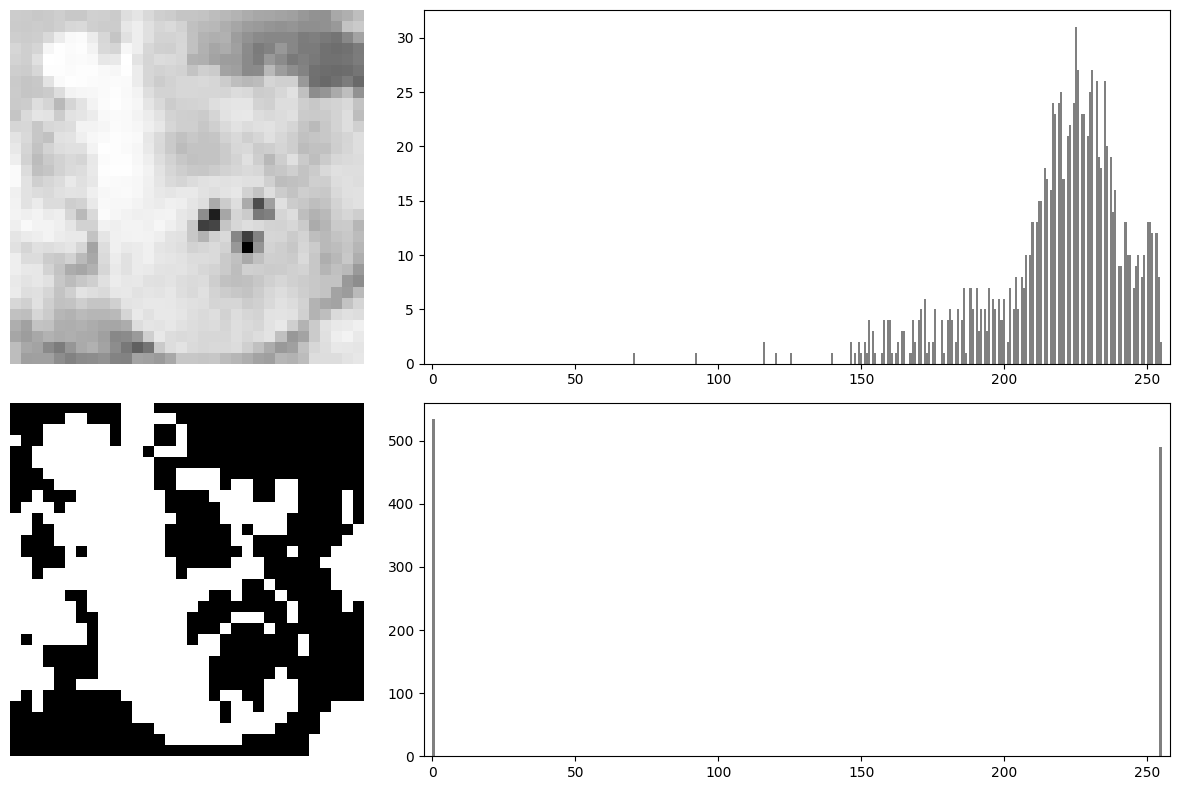

In [ ]:
w = 4
cs_list = [img, img_cs_thr]
cs_name = ['original', 'thr']
cs_len = len(cs_list)

fig, ax = plt.subplots(cs_len,2, figsize=(w*3, w*cs_len), width_ratios=(1,2))

for i in range(cs_len):

  method = cs_name[i]

  ax[i,0].imshow(vchannel(cs_list[i]),cmap = 'gray')
  ax[i,0].set_xticks([])
  ax[i,0].set_yticks([])
  ax[i,0].set_axis_off()


  ax[i,1].hist(vchannel(cs_list[i]).ravel(), bins=256, color='gray')
  ax[i,1].set_xlim(-3, 258)

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# 方法二過程圖(灰): 原圖 / 原圖hist
#                  處理 / 處理hist

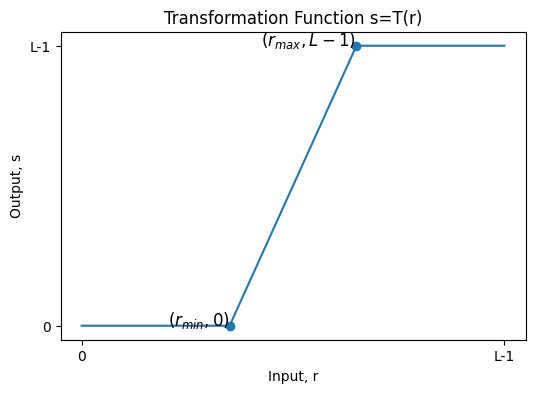

In [ ]:
r1, s1 = 0.35, 0
r2, s2 = 0.65, 1

L = 1
r = np.linspace(0, L, 500)
s = np.zeros_like(r)

s[r <= r1] = 0
s[(r > r1) & (r <= r2)] = ((r[(r > r1) & (r <= r2)] - r1) / (r2 - r1) * (s2 - s1)) + s1
s[r > r2] = L

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, s, label='T(r)')
ax.scatter([r1,r2], [s1,s2])
ax.text(r1, s1, r'$(r_{min}, 0)$', fontsize=12, ha='right')
ax.text(r2, s2, r'$(r_{max}, L-1)$', fontsize=12, ha='right')
ax.set_xlabel('Input, r')
ax.set_ylabel('Output, s')
ax.set_xticks([0, L])
ax.set_xticklabels(['0', 'L-1'])
ax.set_yticks([0, L])
ax.set_yticklabels(['0', 'L-1'])
plt.title('Transformation Function s=T(r)')
plt.grid(False)
plt.show()

In [ ]:
# Min-Max
img_cs_minmax_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
min = np.min(img_cs_minmax_hsv[:, :, 2].ravel())
max = np.max(img_cs_minmax_hsv[:, :, 2].ravel())
ps_img = (img_cs_minmax_hsv[:, :, 2] - min) / (max - min) * 255
img_cs_minmax_hsv[:, :, 2] = np.clip(ps_img, 0, 255).astype(np.uint8)
img_cs_minmax = cv2.cvtColor(img_cs_minmax_hsv, cv2.COLOR_HSV2RGB)


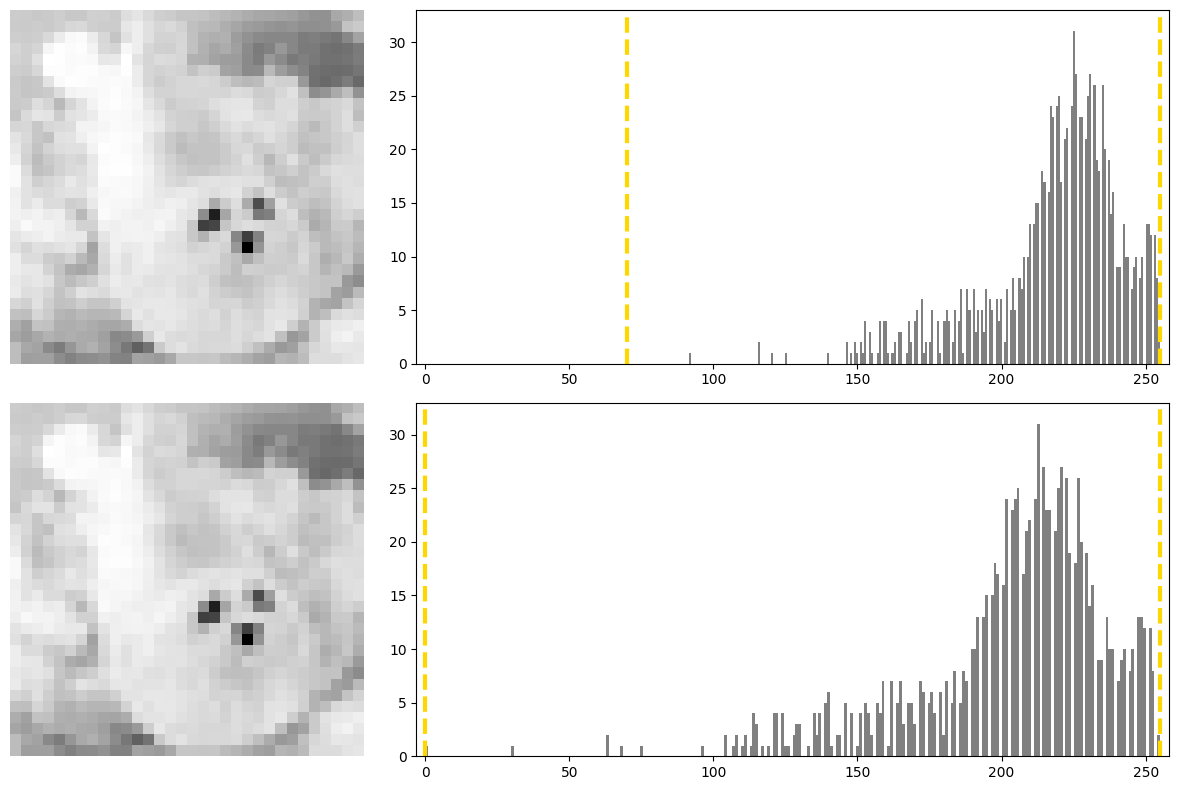

In [ ]:
w = 4

cs_list = [img, img_cs_minmax]
cs_name = ['original', 'minmax']

cs_len = len(cs_list)

fig, ax = plt.subplots(cs_len,2, figsize=(w*3, w*cs_len), width_ratios=(1,2))

for i in range(cs_len):

  method = cs_name[i]

  ax[i,0].imshow(vchannel(cs_list[i]),cmap = 'gray')
  ax[i,0].set_xticks([])
  ax[i,0].set_yticks([])
  ax[i,0].set_axis_off()


  ax[i,1].hist(vchannel(cs_list[i]).ravel(), bins=256, color='gray')
  ax[i,1].set_xlim(-3, 258)
  ax[i,1].set_ylim(0,y_lim)
  if method == 'original' :
    ax[i,1].axvline(min, color='gold', linestyle='dashed', linewidth=3)
    ax[i,1].axvline(max, color='gold', linestyle='dashed', linewidth=3)
  if method == 'minmax' :
    ax[i,1].axvline(0, color='gold', linestyle='dashed', linewidth=3)
    ax[i,1].axvline(255, color='gold', linestyle='dashed', linewidth=3)


plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# 方法三過程圖(灰): 原圖 / 原圖hist
#                  處理 / 處理hist

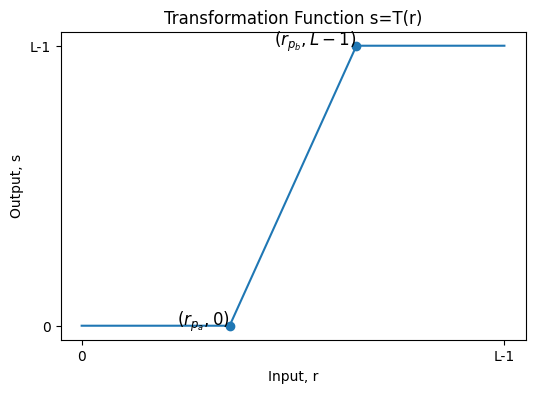

In [ ]:
r1, s1 = 0.35, 0
r2, s2 = 0.65, 1

L = 1
r = np.linspace(0, L, 500)
s = np.zeros_like(r)

s[r <= r1] = 0
s[(r > r1) & (r <= r2)] = ((r[(r > r1) & (r <= r2)] - r1) / (r2 - r1) * (s2 - s1)) + s1
s[r > r2] = L

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, s, label='T(r)')
ax.scatter([r1,r2], [s1,s2])
ax.text(r1, s1, r'$(r_{p_a}, 0)$', fontsize=12, ha='right')
ax.text(r2, s2, r'$(r_{p_b}, L-1)$', fontsize=12, ha='right')
ax.set_xlabel('Input, r')
ax.set_ylabel('Output, s')
ax.set_xticks([0, L])
ax.set_xticklabels(['0', 'L-1'])
ax.set_yticks([0, L])
ax.set_yticklabels(['0', 'L-1'])
plt.title('Transformation Function s=T(r)')
plt.grid(False)
plt.show()

In [ ]:
# Percentile
img_cs_percent_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
p2, p98 = np.percentile(img_cs_percent_hsv[:, :, 2].ravel(), (2, 98))
ps_img = (img_cs_percent_hsv[:, :, 2] - p2) / (p98 - p2) * 255
img_cs_percent_hsv[:, :, 2] = np.clip(ps_img, 0, 255).astype(np.uint8)
img_cs_percent = cv2.cvtColor(img_cs_percent_hsv, cv2.COLOR_HSV2RGB)

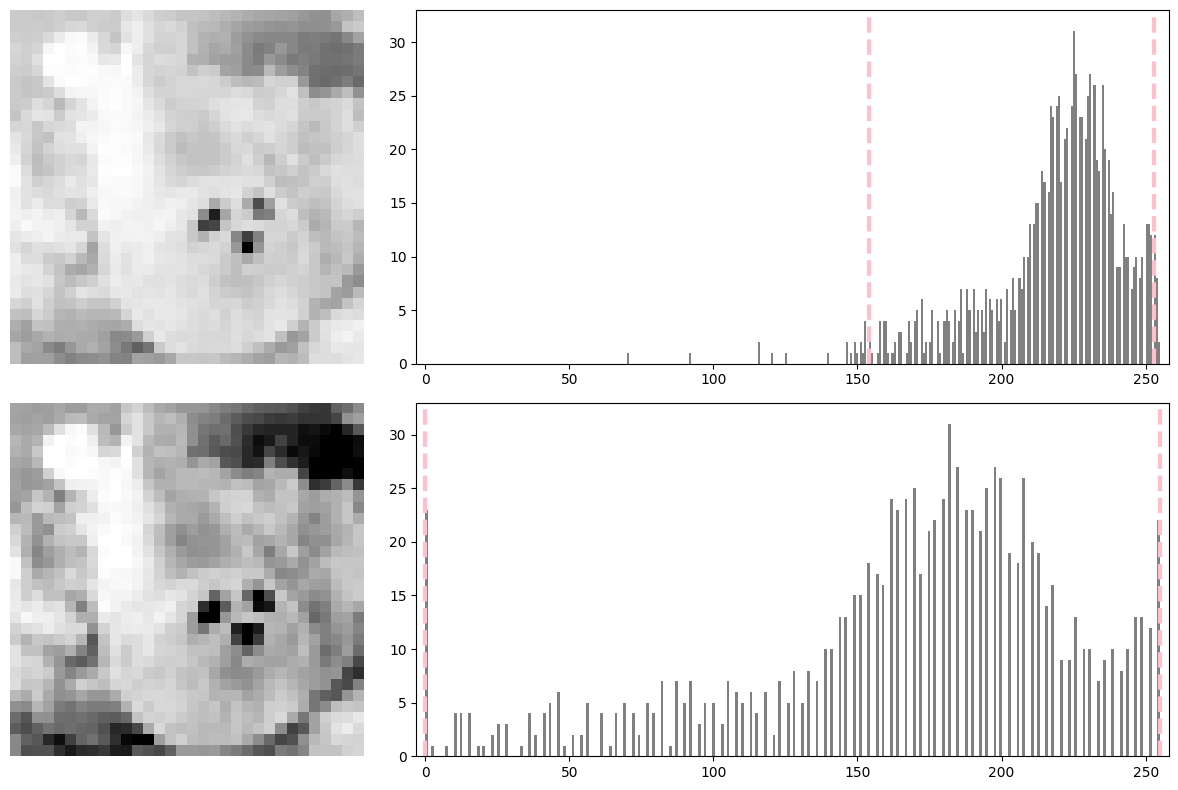

In [ ]:
w = 4

cs_list = [img, img_cs_percent]
cs_name = ['original', 'percentile']

cs_len = len(cs_list)

fig, ax = plt.subplots(cs_len,2, figsize=(w*3, w*cs_len), width_ratios=(1,2))


for i in range(cs_len):

  method = cs_name[i]

  ax[i,0].imshow(vchannel(cs_list[i]),cmap = 'gray')
  ax[i,0].set_xticks([])
  ax[i,0].set_yticks([])
  ax[i,0].set_axis_off()

  ax[i,1].hist(vchannel(cs_list[i]).ravel(), bins=256, color='gray')
  ax[i,1].set_xlim(-3, 258)

  ax[i,1].set_ylim(0,y_lim)


  if method == 'original' :
    ax[i,1].axvline(p2, color='#FFC0CB', linestyle='dashed', linewidth=3)
    ax[i,1].axvline(p98, color='#FFC0CB', linestyle='dashed', linewidth=3)
  if method == 'percentile' :
    ax[i,1].axvline(0, color='#FFC0CB', linestyle='dashed', linewidth=3)
    ax[i,1].axvline(255, color='#FFC0CB', linestyle='dashed', linewidth=3)

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# 全部對比圖(彩+灰+hist)

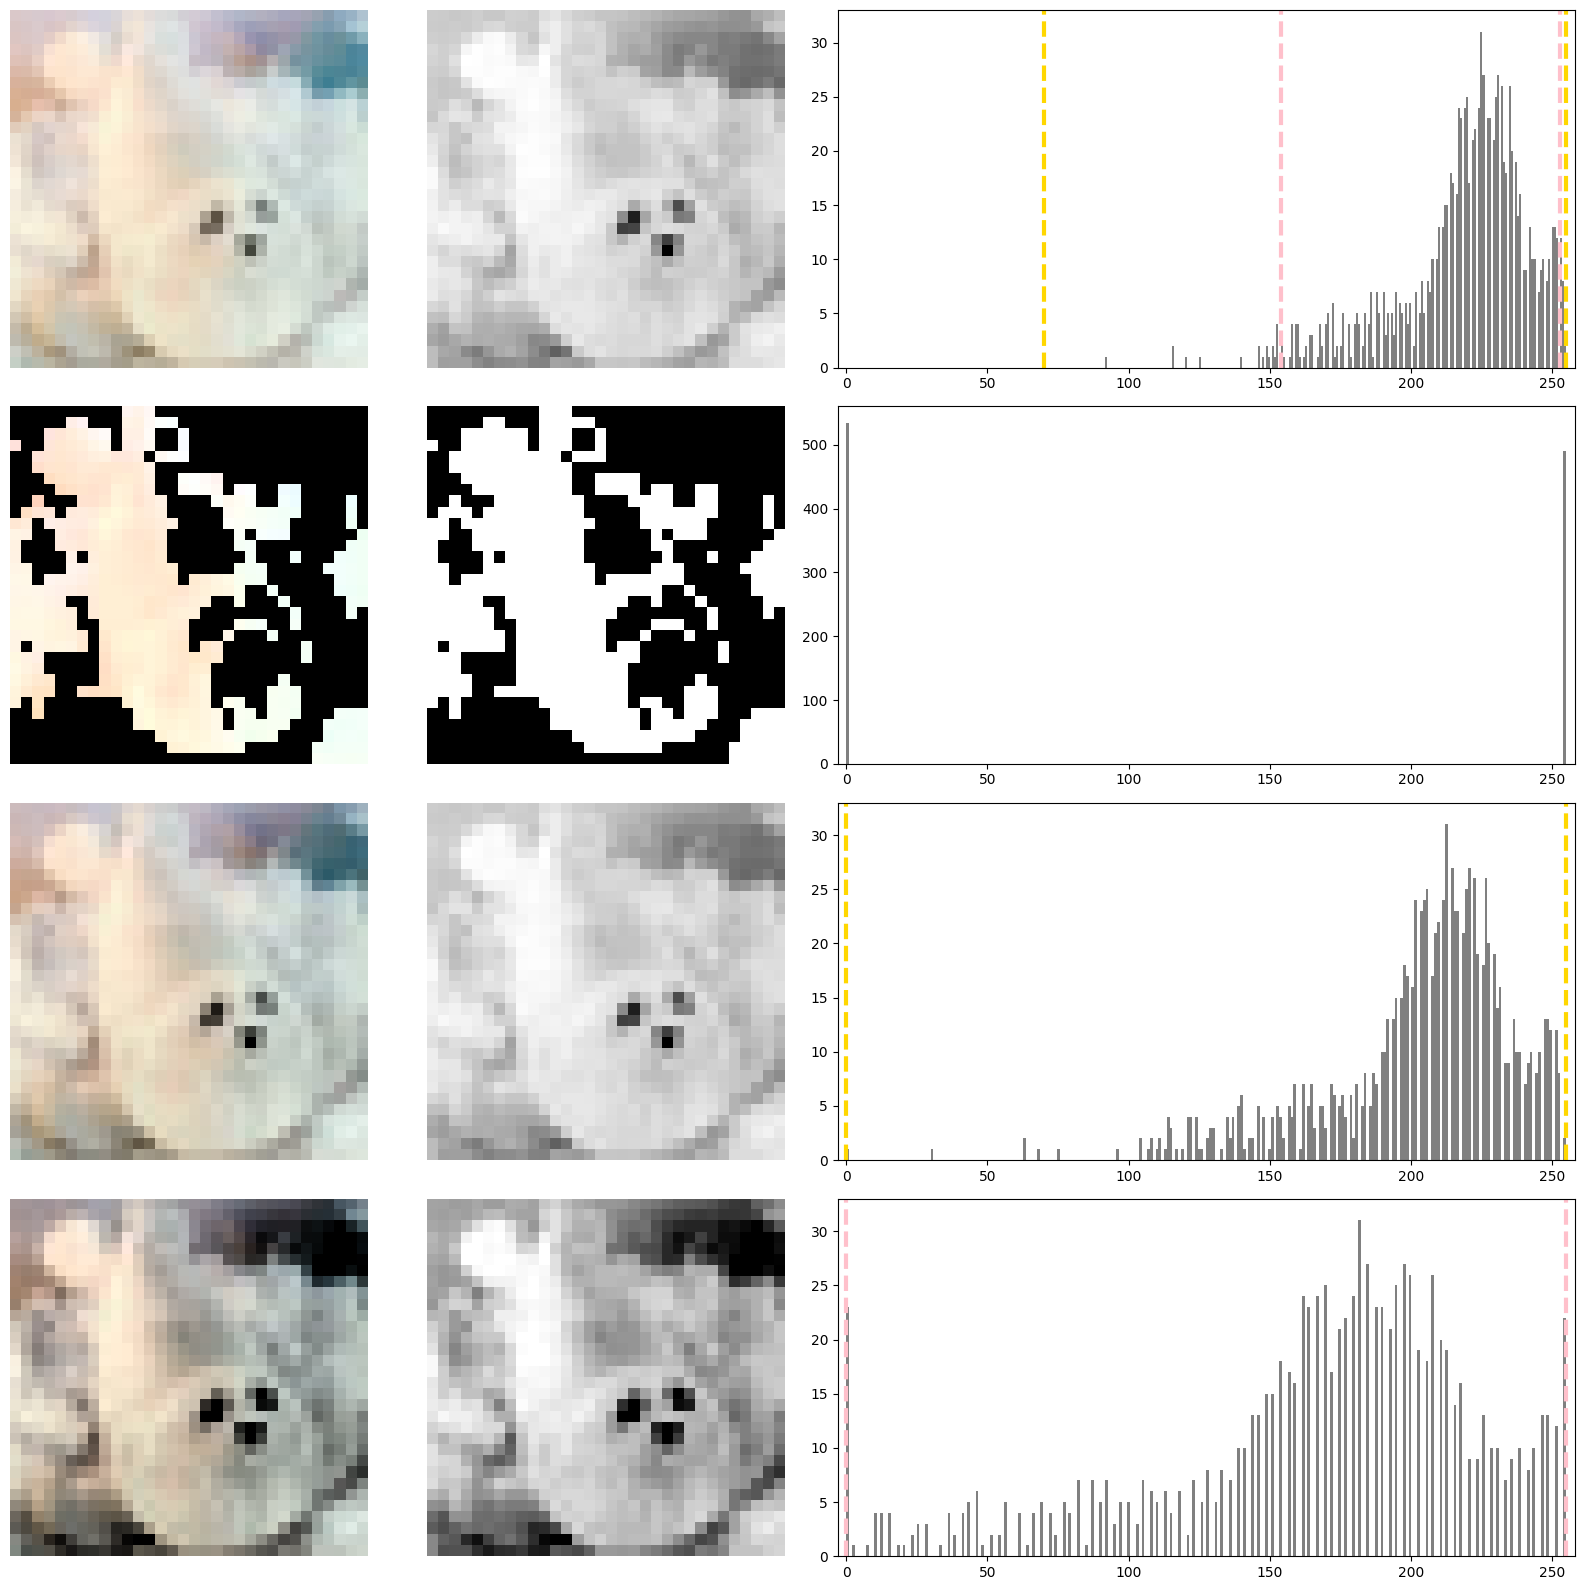

In [ ]:
w = 4

cs_list = [img, img_cs_thr, img_cs_minmax, img_cs_percent]
cs_name = ['original', 'thr', 'minmax','percentile']


cs_len = len(cs_list)
fig, ax = plt.subplots(cs_len,3, figsize=(w*4, w*cs_len), width_ratios=(1,1,2))


for i in range(cs_len):

  method = cs_name[i]

  ax[i,0].imshow(cs_list[i])
  ax[i,0].set_xticks([])
  ax[i,0].set_yticks([])
  ax[i,0].set_axis_off()

  ax[i,1].imshow(vchannel(cs_list[i]),cmap = 'gray')
  ax[i,1].set_xticks([])
  ax[i,1].set_yticks([])
  ax[i,1].set_axis_off()

  ax[i,2].hist(vchannel(cs_list[i]).ravel(), bins=256, color='gray')
  ax[i,2].set_xlim(-3, 258)
  if method != 'thr':
    ax[i,2].set_ylim(0,y_lim)

  if method == 'original' and 'minmax' in cs_name:
    ax[i,2].axvline(min, color='gold', linestyle='dashed', linewidth=3)
    ax[i,2].axvline(max, color='gold', linestyle='dashed', linewidth=3)
  if method == 'original' and 'percentile' in cs_name:
    ax[i,2].axvline(p2, color='#FFC0CB', linestyle='dashed', linewidth=3)
    ax[i,2].axvline(p98, color='#FFC0CB', linestyle='dashed', linewidth=3)

  elif method == 'minmax':
    ax[i,2].axvline(0, color='gold', linestyle='dashed', linewidth=3)
    ax[i,2].axvline(255, color='gold', linestyle='dashed', linewidth=3)

  elif method == 'percentile':
    ax[i,2].axvline(0, color='#FFC0CB', linestyle='dashed', linewidth=3)
    ax[i,2].axvline(255, color='#FFC0CB', linestyle='dashed', linewidth=3)


plt.tight_layout()
plt.grid(False)
plt.show()

### Histogram Equalization

In [ ]:
# 原圖彩 / 原圖灰 / 原圖hist
# 處理彩 / 處理灰 / 處理hist

In [ ]:
img_idx = 1936
img = X_array_list[0][img_idx].reshape(32, 32, 3)
img_he = X_array_list[3][img_idx].reshape(32, 32, 3)

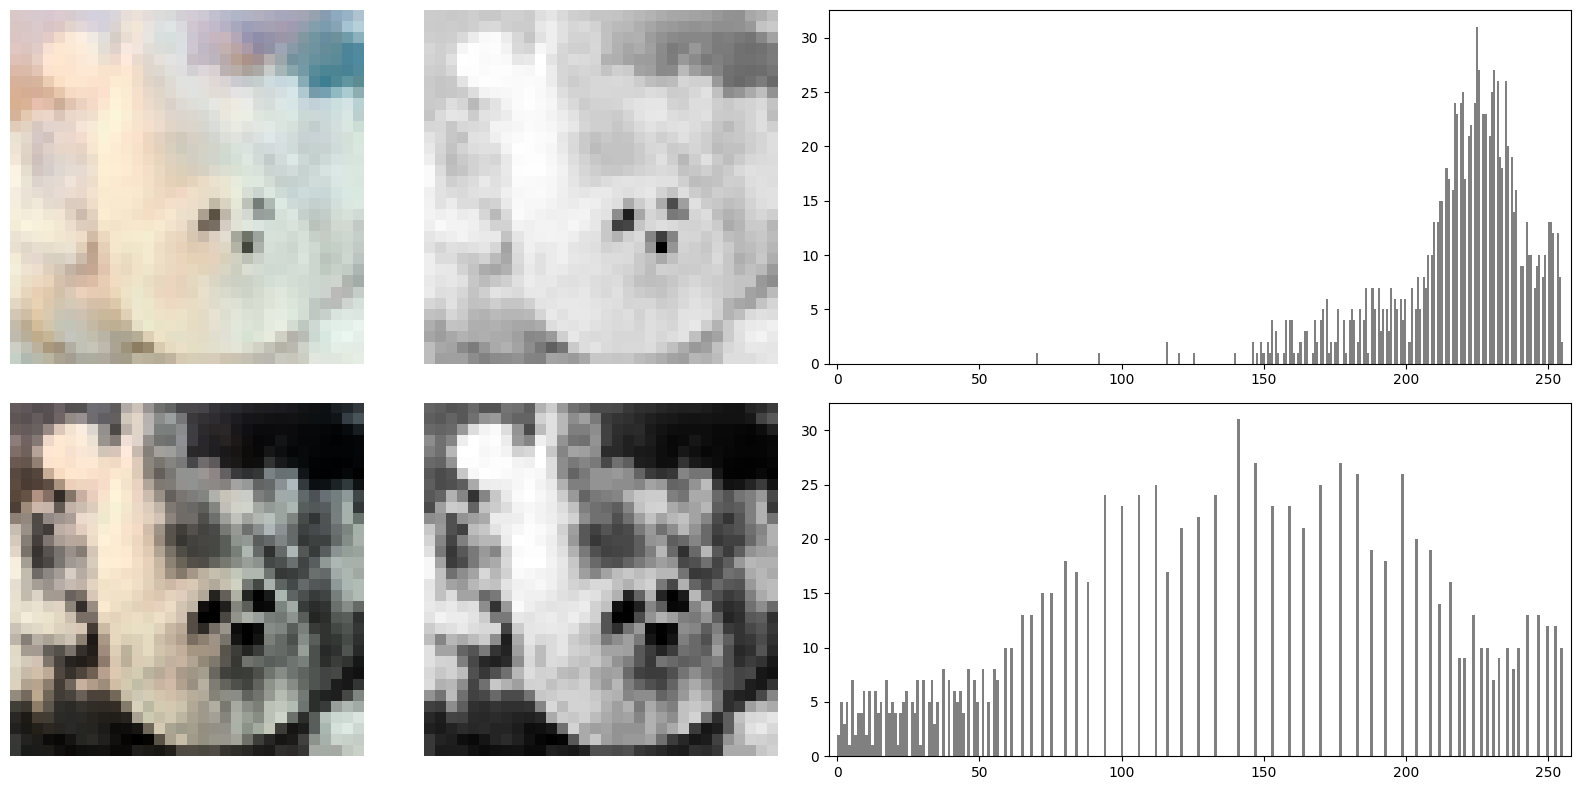

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), width_ratios=(1, 1, 2))

axes[0, 0].imshow(img)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
axes[0, 0].set_axis_off()

axes[0, 1].imshow(vchannel(img),cmap='gray')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
axes[0, 1].set_axis_off()

axes[0, 2].hist(vchannel(img).ravel(), bins=256, color='gray')
axes[0, 2].set_xlim(-3, 258)

axes[1, 0].imshow(img_he)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
axes[1, 0].set_axis_off()

axes[1, 1].imshow(vchannel(img_he),cmap='gray')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
axes[1, 1].set_axis_off()

axes[1, 2].hist(vchannel(img_he).ravel(), bins=256, color='gray')
axes[1, 2].set_xlim(-3, 258)

plt.tight_layout()
plt.grid(False)

In [ ]:
# cdf圖

## 處理結果

In [ ]:
X_ = datasets_dict['X_0']
y_ = datasets_dict['y_0']

X_array_list = [X_,contrast_stretching(X_), histogram_equalization(X_), sharpening(X_)]
process_list = ['Original', 'Contrast_Stretching', 'Histogram_Equalization', 'Sharpening']

In [ ]:
examples = (0, 0), (600, 1), (1200, 2), (1800, 3), (2400,4)

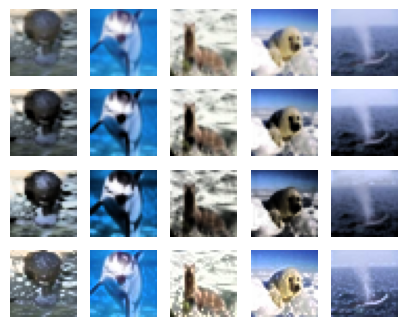

In [ ]:
n = len(X_array_list)

plt.figure(figsize=(5,n))
k=0
for X_ in X_array_list:
  for i,j in examples:
    plt.subplot(n, 5, k+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    if (X_[i].shape) == (32*32*3,):
      plt.imshow(X_[i].reshape(32, 32, 3))
    else:
      plt.imshow(X_[i].reshape(32, 32),cmap='gray')
  k+=5
plt.show()

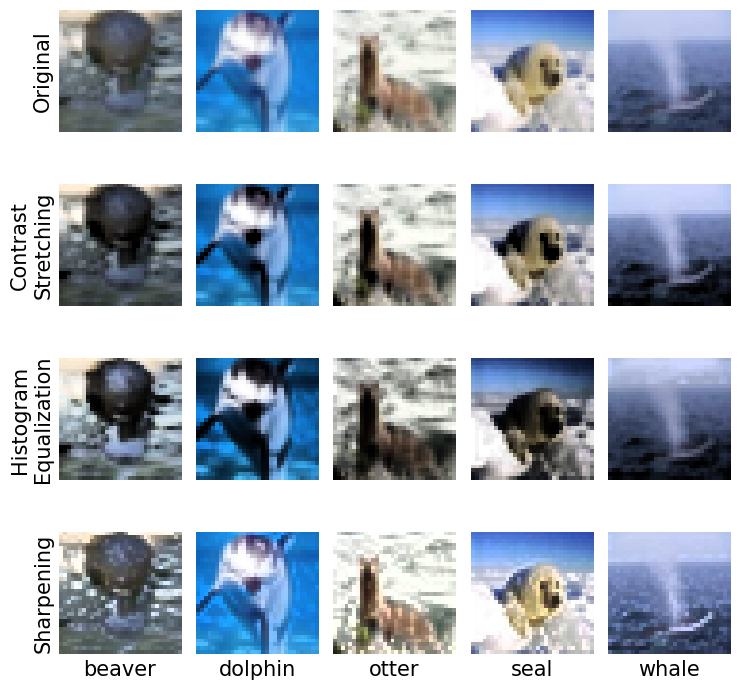

In [ ]:
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale']
process_list = ['Original', 'Contrast\nStretching', 'Histogram\nEqualization', 'Sharpening']
process_names = process_list
n = len(X_array_list)

examples = (0, 0), (600, 1), (1200, 2), (1800, 3), (2400, 4)

fig, axes = plt.subplots(nrows=len(process_names), ncols=len(examples), figsize=(7.5, 7.5))

for row, process_name in enumerate(process_names):
    for col, (idx, class_idx) in enumerate(examples):
        ax = axes[row, col]
        img = X_array_list[row][idx]
        if img.shape == (32*32*3,):
            ax.imshow(img.reshape(32, 32, 3))
        else:
            ax.imshow(img.reshape(32, 32), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(class_names[class_idx], fontsize=15) if row == (n-1) else None
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        if col == 0:
            ax.set_ylabel(process_name, fontsize=15)

plt.tight_layout()
plt.show()

# 對多個資料集分類

In [ ]:
def save_csv(table_list, filename):
  with open(filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(table_list)
  print(f"成功創建新的 CSV 檔案 '{filename}'")

In [ ]:
super_classes = ['Aquatic Mammals', 'Fish', 'Flowers', 'Food Container', 'Fruit and Vegetables',
                 'Household Electrical Devices', 'Household Furniture', 'Insects', 'Large Carnivores', 'Large Man-made Outdoor Things',
                 'Large Natural Outdoor Scenes', 'Large Omnivores and Herbivores', 'Medium-sized Mammals', 'Non-insect Invertebrates', 'People',
                 'Reptiles', 'Small Mammals', 'Trees', 'Vehicles 1', 'Vehicles 2']

In [ ]:
# KNN 10
all_accuracy = []
for i in range(20):
  print(f'\nDataset{i+1}: {super_classes[i]}')
  t0 = time.time()
  X_ = datasets_dict[f'X_{i}']
  y_ = datasets_dict[f'y_{i}']
  X_array_list = [X_, contrast_stretching(X_), histogram_equalization(X_), sharpening(X_)]
  process_list = ['Original', 'Contrast_Stretching', 'Histogram_Equalization', 'Sharpening']

  clf = KNeighborsClassifier(n_neighbors=10)

  knn_accuracy_list = []
  for X_ in X_array_list:
    RUN_accuracy = []
    for j in range(10):
      kf = KFold(n_splits=10, shuffle=True, random_state=j)
      for train_index, valid_index in kf.split(X_):
        X_train, X_valid = X_[train_index], X_[valid_index]
        y_train, y_valid = y_[train_index], y_[valid_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        accuracy = np.round(accuracy_score(y_valid, y_pred),4)
        RUN_accuracy.append(accuracy)
    knn_accuracy_list.append(RUN_accuracy)
  all_accuracy.append(knn_accuracy_list)
  knn_table = pt.PrettyTable()
  knn_table.field_names = ["Processing Method"] + [f"Index {i+1}" for i in range(100)]

  for process, accuracy in zip(process_list, knn_accuracy_list):
    knn_table.add_row([process] + accuracy)
  print(knn_table)

  knn_table_list = [knn_table.field_names]
  knn_table_list.extend(knn_table._rows)

  #save_csv(knn_table_list, f"KNN10_Dataset{i+1}_new.csv")
  t1 = time.time()
  print('Time: {:.0f} m {:.0f} s'.format((t1-t0)//60, (t1-t0)%60))


Dataset1: Aquatic Mammals
+------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------

KeyboardInterrupt: 